In [2]:
print("Hello wprld")

Hello wprld


In [3]:
import pandas as pd


In [4]:
df = pd.read_csv('/content/placement.csv')

In [6]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df.shape

(100, 4)

In [9]:
#Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output columns
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [11]:
df = df.iloc[:,1:]

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [20]:
import matplotlib.pyplot as plt
#EDA

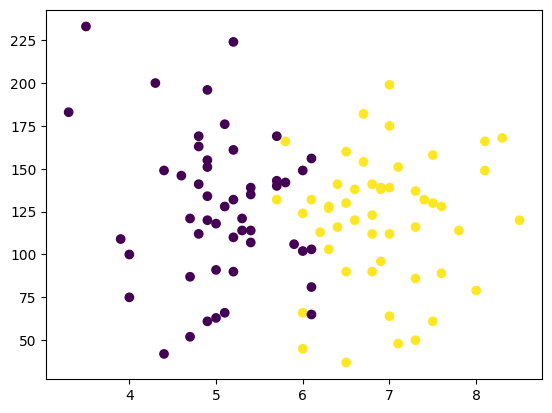

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [27]:
# step 1
x = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [32]:
y.shape

(100,)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.1)

In [37]:
Y_train

,placement
25,0
23,0
27,1
80,0
97,1
...,...
12,0
17,0
56,0
76,0


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.fit_transform(X_test)

In [47]:
X_test

array([[-2.15530008, -1.5202716 ],
       [ 0.29176551, -0.03134581],
       [ 0.00941179, -0.42316838],
       [ 0.66823714,  1.41839773],
       [-1.1200031 ,  1.45757999],
       [ 1.4211804 , -0.97171999],
       [ 0.95059087, -0.07052806],
       [-0.55529565,  1.18330418],
       [ 0.57411924, -0.03134581],
       [-0.08470612, -1.01090225]])

In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [52]:
#model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [53]:
y_pred = clf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(Y_test, y_pred)

0.8

In [56]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

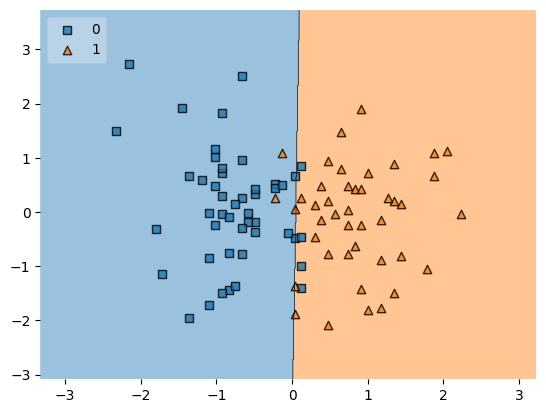

In [60]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [61]:
import pickle

In [62]:
pickle.dump(clf,open('model.pkl','wb'))